In [97]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [98]:
files_path = 'D:\\Stations_data\\Bani\\all_months_copy'
os.chdir(files_path)

In [99]:
df = pd.read_csv('till_january.csv', sep=',')
#df

In [100]:
df['date'] = pd.to_datetime(df.date, format = "%d.%m.%Y %H:%M:%S")
df = df.set_index('date')
df = df.sort_index()

In [101]:
df_1hr = df.resample('60min').mean()

In [102]:
df2 = pd.read_csv('Temp_Rain_Bani.csv', sep = ',')

In [103]:
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")

In [104]:
df2 = df2.set_index('Date & Time')

In [105]:
df2_1hr = df2.resample('60min').mean()

In [106]:
df3 = pd.read_csv('Rainfall_data_new.csv', sep = ',', usecols = ['Date & Time', 'Int_Rainfall (mm)'])
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'])

In [107]:
df3 = df3.set_index('Date & Time')
rainfall_1hr = df3.resample('60min').mean()
rainfall_1hr.fillna(0.0, inplace = True)
#rainfall_1hr

,Int_Rainfall (mm)
Date & Time,
2020-03-01 00:00:00,0.3
2020-03-01 01:00:00,0.0
2020-03-01 02:00:00,0.0
2020-03-01 03:00:00,0.0
2020-03-01 04:00:00,0.0
...,...
2021-01-28 01:00:00,0.0
2021-01-28 02:00:00,0.0
2021-01-28 03:00:00,0.0


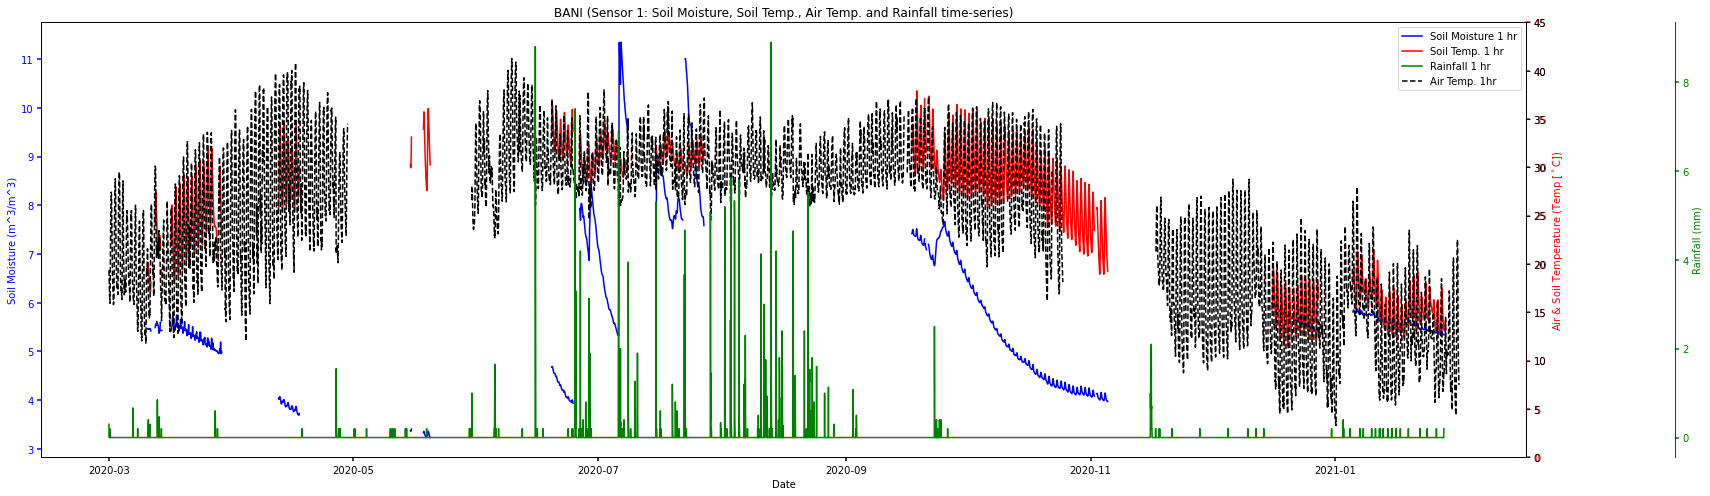

In [123]:
#Sensor 1
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
#par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
#make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
#par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S1SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S1Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 45)
par3.set_ylim(0, 45)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 1: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
#par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
#par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

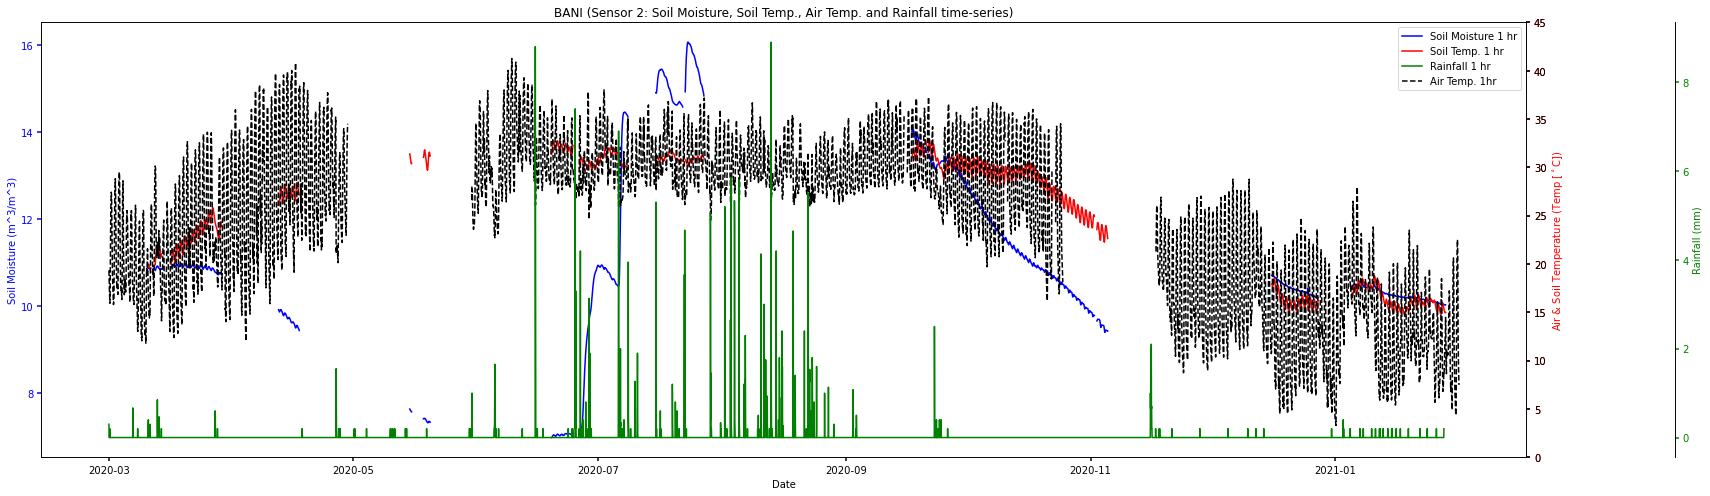

In [125]:
#Sensor 2
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S2SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S2Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 45)
par3.set_ylim(0, 45)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 2: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

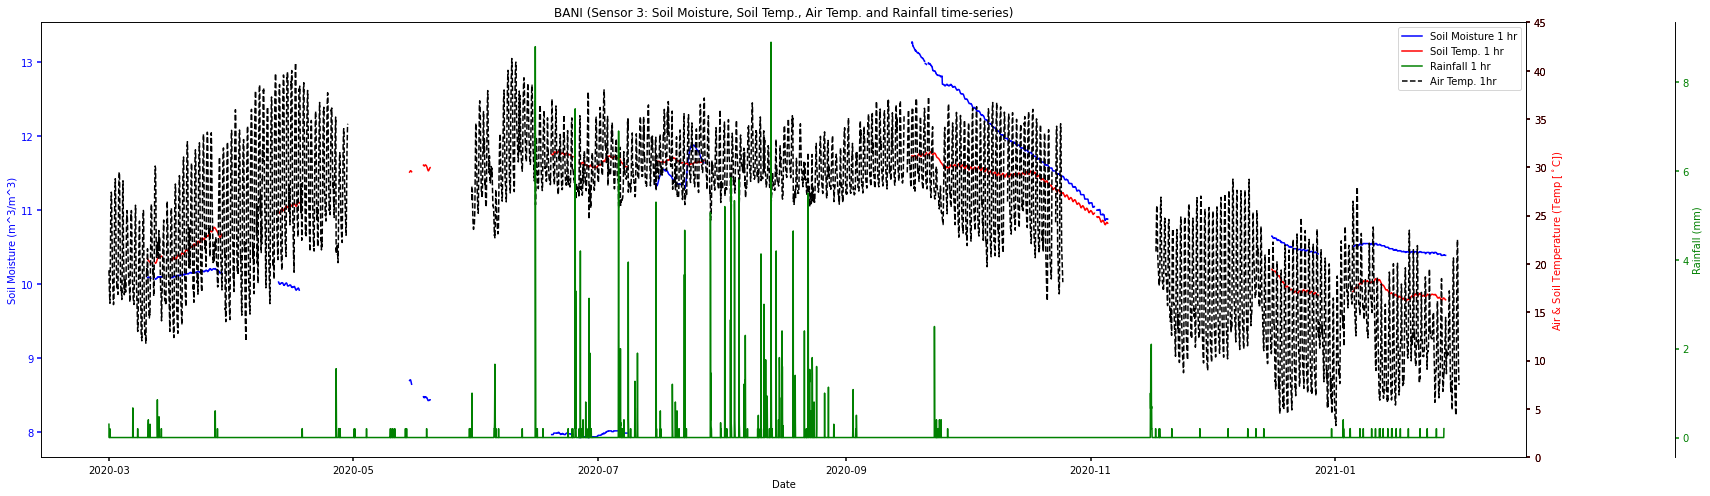

In [126]:
#Sensor 3
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S3SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S3Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 45)
par3.set_ylim(0, 45)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 3: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

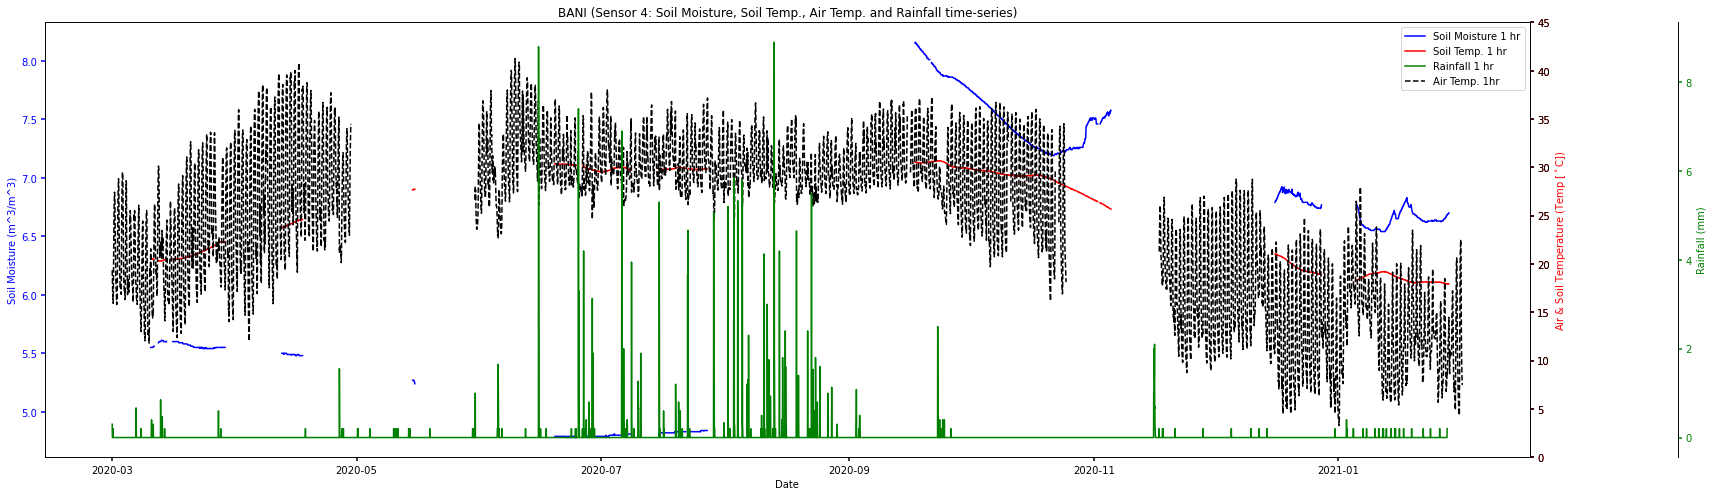

In [127]:
#Sensor 4
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S4SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S4Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 45)
par3.set_ylim(0, 45)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 4: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

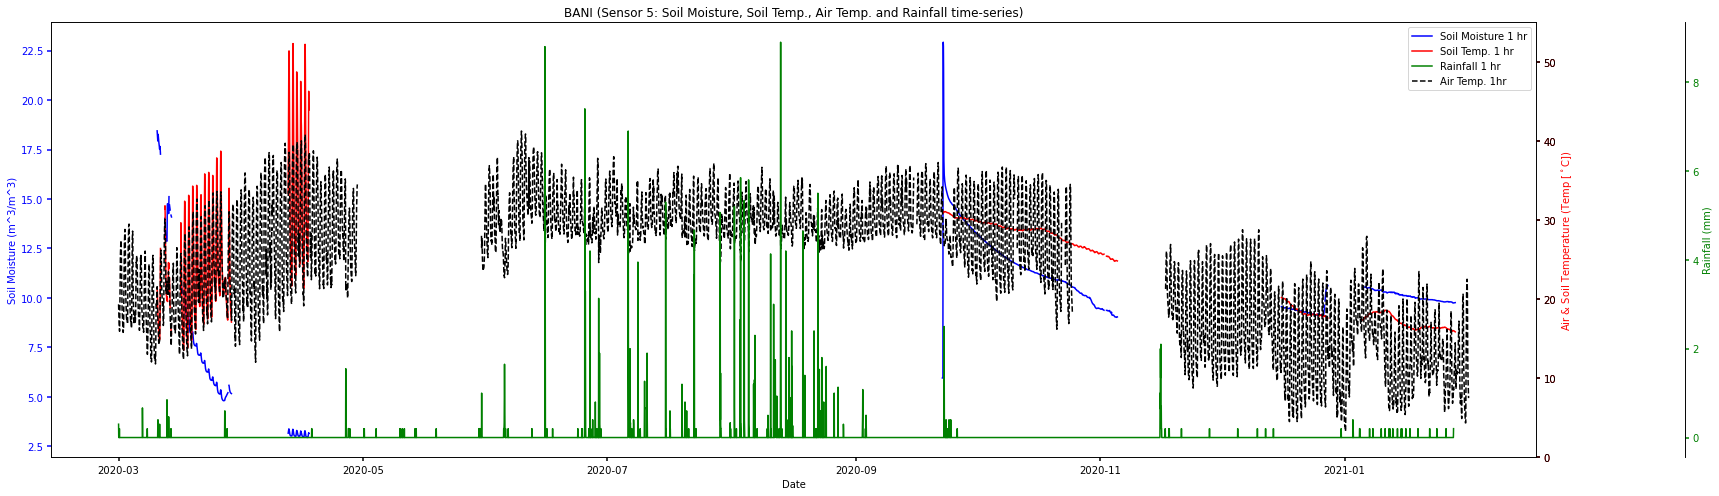

In [132]:
#Sensor 5
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S5SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S5Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 55)
par3.set_ylim(0, 55)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 5: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

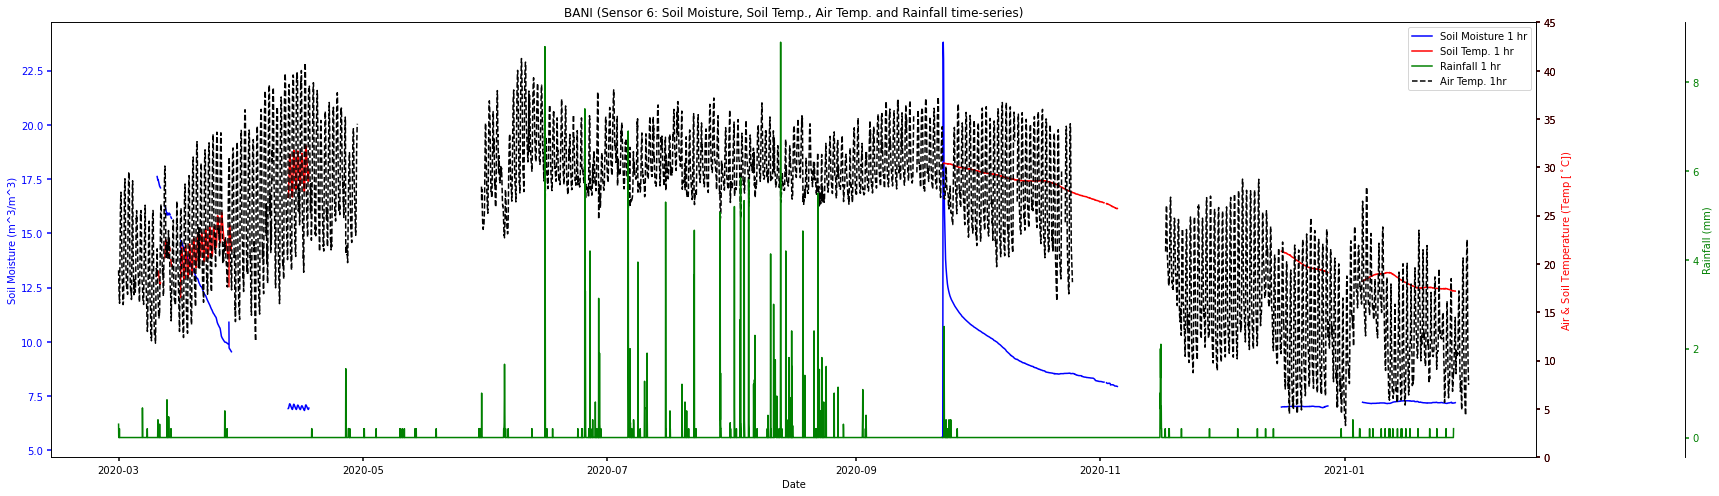

In [136]:
#Sensor 6
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S6SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S6Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 45)
par3.set_ylim(0, 45)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 6: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

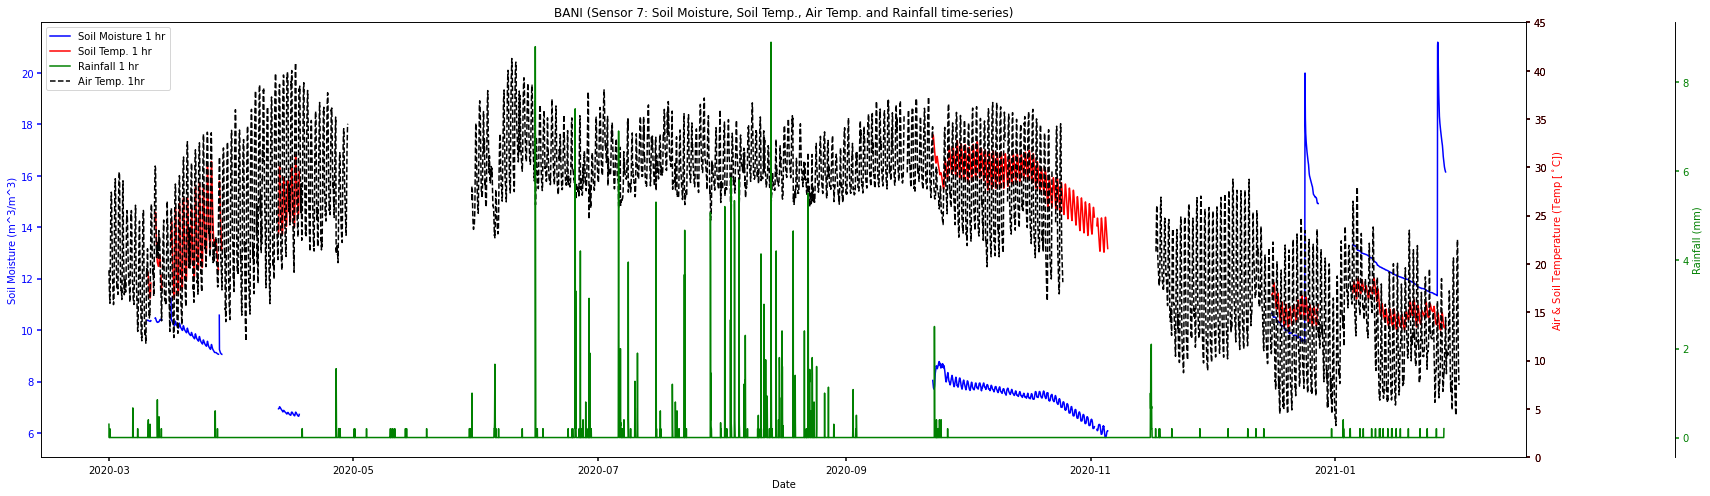

In [137]:
#Sensor 7
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S7SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S7Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 45)
par3.set_ylim(0, 45)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 7: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

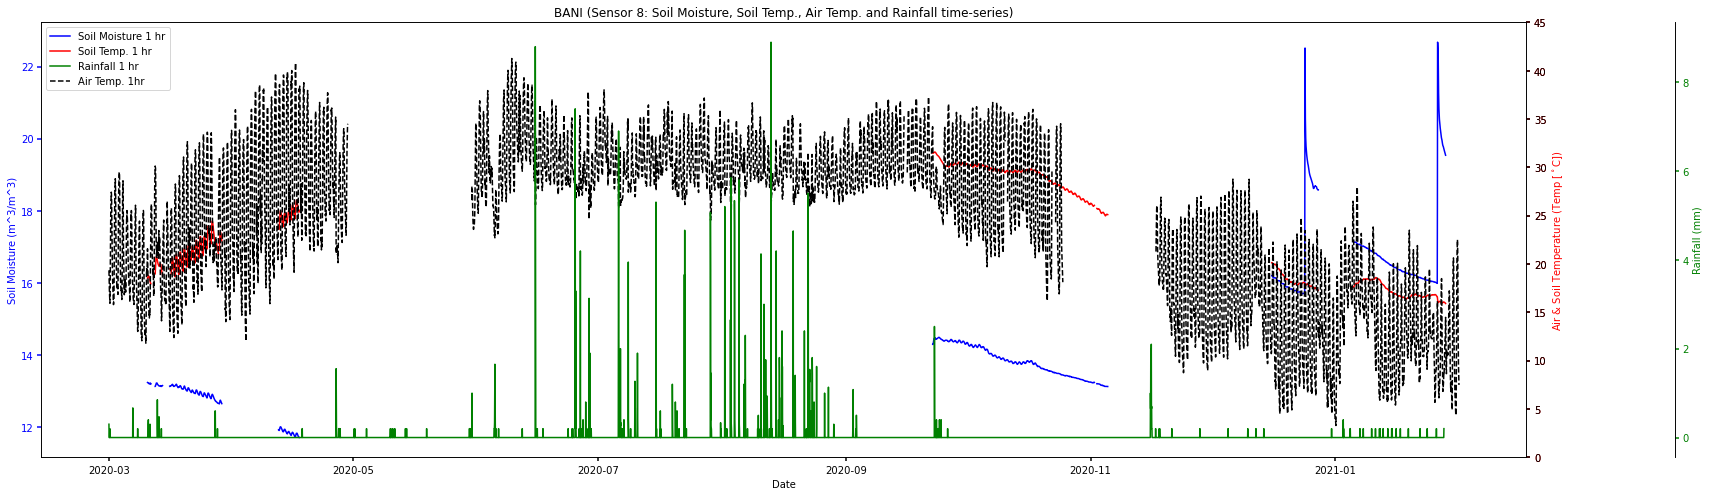

In [140]:
#Sensor 8
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S8SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S8Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 45)
par3.set_ylim(0, 45)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 8: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

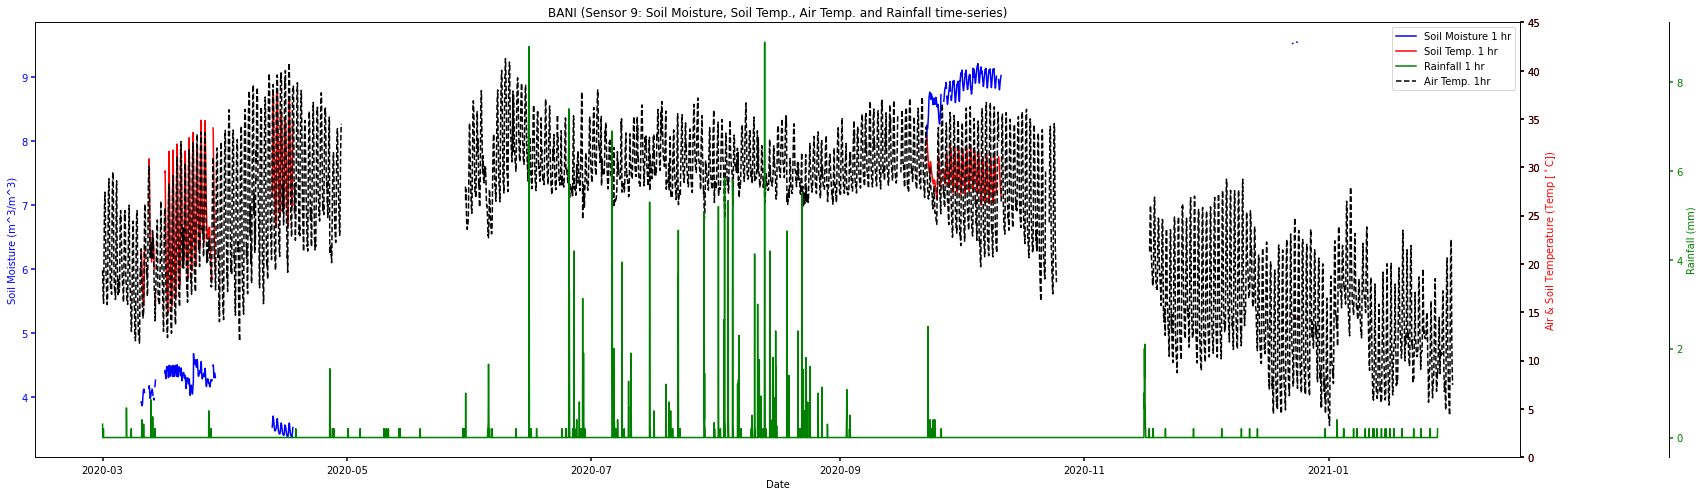

In [141]:
#Sensor 9
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S9SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S9Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par1.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 45)
par3.set_ylim(0, 45)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 9: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

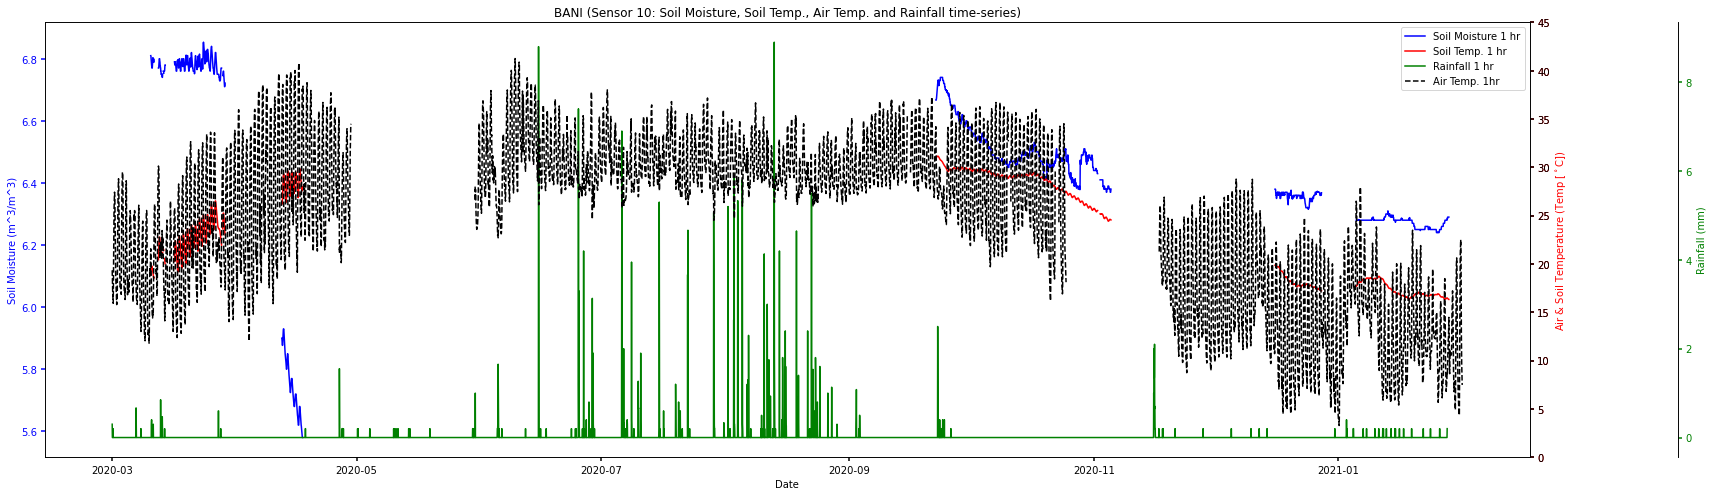

In [142]:
#Sensor 10
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S10SM, "b-", label="Soil Moisture 1 hr")
p2, = par1.plot(df_1hr.index, df_1hr.S10Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(rainfall_1hr.index, rainfall_1hr['Int_Rainfall (mm)'], "g-", label="Rainfall 1 hr")
p4, = par3.plot(df2_1hr.index, df2_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 45)
par3.set_ylim(0, 45)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 10: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
host.set_ylabel("Soil Moisture (m^3/m^3)")
par1.set_ylabel("Air & Soil Temperature (Temp [$^\circ$C])")
par2.set_ylabel("Rainfall (mm)")
#par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show()